In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from scipy import stats
import matplotlib
import tikzplotlib

pd.set_option('display.max_rows', 200)


In [2]:
results0 = pd.read_csv('results_0.csv').iloc[:, 10:]
results1 = pd.read_csv('results_1.csv').iloc[:, 10:]
results2 = pd.read_csv('results_2.csv').iloc[:, 10:]
results3 = pd.read_csv('results_3.csv').iloc[:, 10:]
results4 = pd.read_csv('results_4.csv').iloc[:, 10:]

parameters0 = pd.read_csv('parameters_0.csv').iloc[:, 2:]

results0 = pd.concat([parameters0, results0], axis=1)
results1 = pd.concat([parameters0, results1], axis=1)
results2 = pd.concat([parameters0, results2], axis=1)
results3 = pd.concat([parameters0, results3], axis=1)
results4 = pd.concat([parameters0, results4], axis=1)

results = pd.concat([results0, results1, results2, results3, results4]).reset_index()

# results['index'] = np.arange(len(results))

results['Gap'] *= 100
# results['ObjVal_h2'] = results[['ObjVal_h', 'ObjVal_h2']].min(axis=1)
# results.loc[results['init'] == True, 'Runtime'] = results.loc[results['init']== True, 'Runtime'].fillna(3600)
vector = ['Gap' , 'Runtime','NodeCount','ObjVal','Runtime_h','Runtime_h2','ObjVal_h','ObjVal_h2']

results.loc[results['init'] == True, vector] = results.loc[results['init'] == True].groupby(['n_N', 'perc_B', 'k', 'single', 'wL','lazy','A4']).transform(lambda x: x.fillna(x.mean())).reset_index().loc[:, vector]

# results.loc[results['init'] == True, 'NodeCount'] = results.loc[results['init']== True, 'NodeCount'].fillna(method='ffill', limit=100)

# results.loc[results['init'] == True, 'ObjVal_h'] = results.loc[results['init']== True, 'ObjVal_h'].ffill(limit=100)
# results.loc[results['init'] == True, 'Runtime_h'] = results.loc[results['init']== True, 'Runtime_h'].fillna(method='ffill', limit=100)
# results.loc[results['init'] == True, 'Runtime_h2'] = results.loc[results['init']== True, 'Runtime_h2'].fillna(method='ffill', limit=100)

# results.loc[results['init'] == True, 'Gap'] = results.loc[results['init']== True, 'Gap'].fillna(100)

results.to_csv('results_together.csv')





In [3]:
valores = 100*np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
results_noinit = results[results['init'] == False]['Gap']

# interval_noinit = pd.cut(results_noinit, bins = valores)

# noinit_freq_rel_acum = np.array(interval_noinit.value_counts(normalize=True, sort = False, dropna=False).cumsum())

results_init = results[results['init'] == True]['Gap']

# interval_init = pd.cut(results_init, bins = valores)

# init_freq_rel_acum = np.array(interval_init.value_counts(normalize=True, sort = False, dropna=False).cumsum())

# print(noinit_freq_rel_acum)
# plt.step(valores[:-1], noinit_freq_rel_acum[:-1], label='no initialisation')
# plt.step(valores[:-1], init_freq_rel_acum[:-1], label='initialisation')

# plt.grid(axis='x', color='0.95')
# plt.legend()

# f = Fitter(results_init.dropna(),
#            distributions= get_common_distributions())
# f.fit()
# f.summary()

# f.get_best(method='sumsquare_error')

In [4]:
tabla_comparadora = results.groupby(['n_N', 'single', 'perc_B', 'k', 'wL', 'init']).mean()[['Gap', 'Runtime', 'ObjVal']].round(2).reset_index()
print(tabla_comparadora['Gap'])

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
475    5.77
476     NaN
477    1.10
478     NaN
479    0.72
Name: Gap, Length: 480, dtype: float64


Representamos la diferencia de gaps en funcion de $\omega_L$

AttributeError: 'Legend' object has no attribute '_ncol'

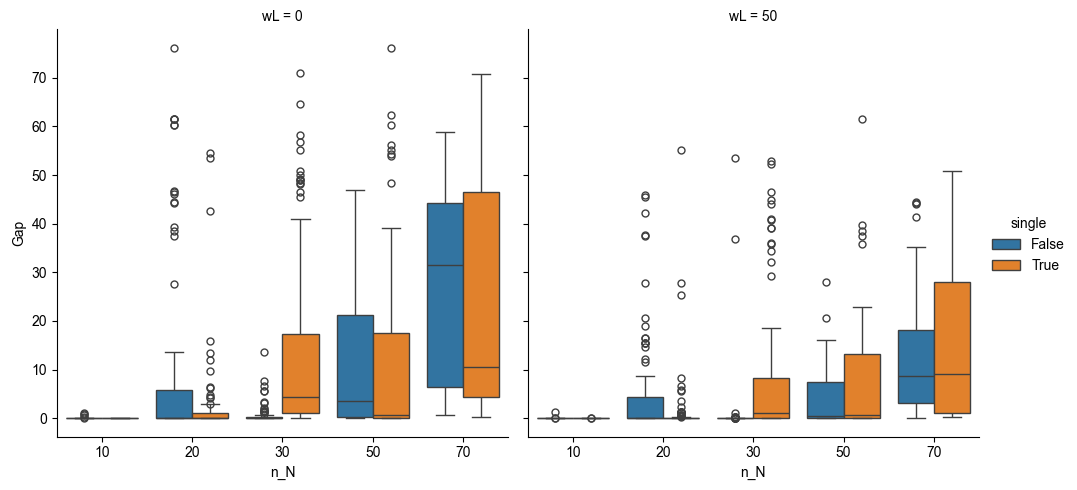

In [5]:
g = sns.catplot(x='n_N', y='Gap', hue='single', col='wL', kind='box', data=results, aspect=1, sharey=True)

sns.set(style="darkgrid")


matplotlib.rcParams['axes.unicode_minus'] = False

tikzplotlib.save('difference_between_wL.tex', encoding='utf-8')


Representamos el gap en funcion del porcentaje de barreras considerado

In [ ]:
g = sns.catplot(x='n_N', y='Gap', hue='single', col='perc_B', kind='box', data=results, aspect=1, sharey=True)

sns.set(style="darkgrid")

import tikzplotlib

matplotlib.rcParams['axes.unicode_minus'] = False

tikzplotlib.save('difference_between_perc_B.tex', encoding='utf-8')


: 

In [ ]:
results_multi = results[results['single'] == False]

dictionary = {}

results['isnull'] = results.Gap.isnull()

prop_nan = results.groupby(['n_N', 'init', 'isnull']).count().reset_index()

g = sns.catplot(x='n_N', y='single', col='init', hue='isnull', kind='bar', data=prop_nan)
# results.Gap.isnull().groupby(['n_N', 'single', 'perc_B', 'k', 'wL', 'init']).sum()/len(results)

: 

In [ ]:
# valores = [0, 400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000]
# results_noinit = results[results['init'] == False]['Runtime']

# interval_noinit = pd.cut(results_noinit, bins = valores)

# noinit_freq_rel_acum = np.array(interval_noinit.value_counts(normalize=True, sort = False, dropna=False).cumsum())

# results_init = results[results['init'] == True]['Runtime']

# interval_init = pd.cut(results_init, bins = valores)

# init_freq_rel_acum = np.array(interval_init.value_counts(normalize=True, sort = False, dropna=False).cumsum())

# print(noinit_freq_rel_acum)
# plt.step(valores[:-1], noinit_freq_rel_acum[:-1], label='no initialisation')
# plt.step(valores[:-1], init_freq_rel_acum[:-1], label='initialisation')

# plt.grid(axis='x', color='0.95')
# plt.legend()


: 